### Sentimental analysis
   Sentiment analysis (or opinion mining) is a natural language processing (NLP) technique used to determine whether data is positive, negative or neutral. Sentiment analysis is often performed on textual data to help businesses monitor brand and product sentiment in customer feedback, and understand customer needs.

### Approches for sentiment analysis

Rule-based approach: Over here, the lexicon method, tokenization, parsing comes in the rule-based. The approach is that count the number of positive and negative words in the given dataset. If the number of positive words is greater than the negative words then the sentiment is positive else vice-versa.

Automatic Approach: This approach works on the machine learning technique. Firstly, the datasets are trained and predictive analysis is done. The next process is the extraction of words from the text is done. This text extraction can be done using different techniques such as Naive Bayes, Linear Regression, Support Vector, Deep Learning like this machine learning techniques are used.

Hybrid Approach: It is the combination of both the above approaches i.e. rule-based and automatic approach. The surplus is that the accuracy is high compared to the other two approaches.

### Types of sentiment analysis
1)Fine-grained sentiment analysis provides a more precise level of polarity by breaking it down into further categories, usually very positive to very negative. This can be considered the opinion equivalent of ratings on a 5-star scale.
    
   2)Emotion detection identifies specific emotions rather than positivity and negativity. Examples could include happiness, frustration, shock, anger and sadness.
    
   3)Intent-based analysis recognizes actions behind a text in addition to opinion. For example, an online comment expressing frustration about changing a battery could prompt customer service to reach out to resolve that specific issue.
    
   4)Aspect-based analysis gathers the specific component being positively or negatively mentioned. For example, a customer might leave a review on a product saying the battery life was too short. Then, the system will return that the negative sentiment is not about the product as a whole, but about the battery life. 

### Challenges with sentiment analysis

Challenges associated with sentiment analysis typically revolve around inaccuracies in training models. Objectivity, or comments with a neutral sentiment, tend to pose a problem for systems and are often misidentified. For example, if a customer received the wrong color item and submitted a comment "The product was blue," this would be identified as neutral when in fact it should be negative. 

Sentiment can also be challenging to identify when systems cannot understand the context or tone. Answers to polls or survey questions like "nothing" or "everything" are hard to categorize when the context is not given, as they could be labeled as positive or negative depending on the question. 

Similarly, irony and sarcasm often cannot be explicitly trained and lead to falsely labeled sentiments

Computer programs also have trouble when encountering emojis and irrelevant information. Special attention needs to be given to training models with emojis and neutral data so as to not improperly flag texts.

## <h1><center><font color=1E9199>Importing Libraries</font></center></h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

import string # Special operations on strings
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_fsa = pd.read_csv(r"C:\Users\91730\OneDrive\Desktop\Projects - ExcelR\NLP Sentimental Analysis -2\financial_sentiment_data.csv",encoding="ISO-8859-1")

In [3]:
df_fsa

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [4]:
print(df_fsa["Sentence"][0])
print(df_fsa["Sentence"][1])
print(df_fsa["Sentence"][2])
print(df_fsa["Sentence"][3])
print(df_fsa["Sentence"][4])

The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .
$ESI on lows, down $1.50 to $2.50 BK a real possibility
For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .
According to the Finnish-Russian Chamber of Commerce , all the major construction companies of Finland are operating in Russia .
The Swedish buyout firm has sold its remaining 22.4 percent stake , almost eighteen months after taking the company public in Finland .


Insight:

#### By offering Location Based Services, the GeoSolutions technology will benefit from Benefon's GPS solutions.
#### ESI down to 2.50 
#### Last Quarter of 2010, Componeta's net sales doubled from EUR 76m to EUR 131m. It also moved from a Pre-Tax loss of EUR 7m to zero Pre-Tax Profit
#### All the major construction companies of Finland are operating in Russia
#### 18 Months after company went public in finland Swedish firm sold it's remaining 22.4% Stack. 

## <h1><center><font color=1E9199>Exploratory Data Analysis (EDA)</font></center></h1>

In [5]:
df = df_fsa.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [7]:
df.describe()

,Sentence,Sentiment
count,5842,5842
unique,5322,3
top,Managing Director 's comments : `` Net sales f...,neutral
freq,2,3130


In [8]:
df.shape

(5842, 2)

In [9]:
df.isnull().sum()

Sentence     0
Sentiment    0
dtype: int64

#### No Null Values in our Datasets

### Removing Duplicate values

In [10]:
df[df.duplicated()]

,Sentence,Sentiment
1825,Proha Plc ( Euronext :7327 ) announced today (...,neutral
1859,SSH Communications Security Corporation is hea...,neutral
2672,Ahlstrom 's share is quoted on the NASDAQ OMX ...,neutral
3272,The company serves customers in various indust...,neutral
3986,The issuer is solely responsible for the conte...,neutral
5342,The report profiles 614 companies including ma...,neutral


In [11]:
df[df.duplicated()]

,Sentence,Sentiment
1825,Proha Plc ( Euronext :7327 ) announced today (...,neutral
1859,SSH Communications Security Corporation is hea...,neutral
2672,Ahlstrom 's share is quoted on the NASDAQ OMX ...,neutral
3272,The company serves customers in various indust...,neutral
3986,The issuer is solely responsible for the conte...,neutral
5342,The report profiles 614 companies including ma...,neutral


In [12]:
df = df.drop_duplicates()

In [13]:
Duplicate = df[df.duplicated(subset=['Sentence'])]
Duplicate

,Sentence,Sentiment
266,Finnish GeoSentric 's net sales decreased to E...,neutral
283,Sales in Finland decreased by 10.5 % in Januar...,negative
349,Full-year operating result for 2008 was 3.6 mi...,negative
387,"Making matters more difficult , the company sa...",negative
496,"Antti Orkola , president of Kemira GrowHow 's ...",negative
...,...,...
5827,"( ADPnews ) - Oct 21 , 2009 - Finland-based IT...",negative
5831,Finnish developer and manufacturer of mobile p...,negative
5832,Operating profit fell to EUR 38.1 mn from EUR ...,negative
5837,RISING costs have forced packaging producer Hu...,negative


In [14]:
print(df["Sentence"][5821])

Finnish electronics contract manufacturer Scanfil reports net sales of EUR 241.2 mn in 2006 , down from EUR 321.6 mn in 2005 .


In [15]:
df[df['Sentence'] == "( ADPnews ) - Oct 21 , 2009 - Finland-based IT consultancy Tieto Oyj ( HEL : TIE1V ) said today its net profit plunged to EUR 29.4 million ( USD 43.9 m ) for the first nine months of 2009 from EUR 58.7 million for the same period o"]

,Sentence,Sentiment
1186,"( ADPnews ) - Oct 21 , 2009 - Finland-based IT...",neutral
5827,"( ADPnews ) - Oct 21 , 2009 - Finland-based IT...",negative


In [16]:
df = df.drop_duplicates(subset=['Sentence'], keep=False)
df

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5835,HSBC Says Unit to Book $585 Million Charge on ...,negative
5836,Daily Mail parent company in talks with potent...,positive
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral


In [17]:
df = df.reset_index()
df = df.drop('index', axis=1)
df

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
4803,HSBC Says Unit to Book $585 Million Charge on ...,negative
4804,Daily Mail parent company in talks with potent...,positive
4805,Nordic Walking was first used as a summer trai...,neutral
4806,"According shipping company Viking Line , the E...",neutral


In [18]:
df["Sentiment"].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

### Number of Words

In [19]:
df['word_count']= df['Sentence'].apply(lambda x: len(str(x).split(" ")))
df[['Sentence','word_count']].head(6)

,Sentence,word_count
0,The GeoSolutions technology will leverage Bene...,32
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",11
2,"For the last quarter of 2010 , Componenta 's n...",39
3,According to the Finnish-Russian Chamber of Co...,20
4,The Swedish buyout firm has sold its remaining...,23
5,$SPY wouldn't be surprised to see a green close,9


### Number of characters

In [20]:
df['char_count']= df['Sentence'].str.len()  ## this also includes spaces
df[['Sentence','char_count']].head(6)

,Sentence,char_count
0,The GeoSolutions technology will leverage Bene...,218
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",55
2,"For the last quarter of 2010 , Componenta 's n...",193
3,According to the Finnish-Russian Chamber of Co...,128
4,The Swedish buyout firm has sold its remaining...,135
5,$SPY wouldn't be surprised to see a green close,47


## Number of stopwords

In [21]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['stopwords'] = df['Sentence'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['Sentence','stopwords']].head()

,Sentence,stopwords
0,The GeoSolutions technology will leverage Bene...,6
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",4
2,"For the last quarter of 2010 , Componenta 's n...",15
3,According to the Finnish-Russian Chamber of Co...,8
4,The Swedish buyout firm has sold its remaining...,5


## Number of special characters

In [22]:
df['hashtags'] = df['Sentence'].apply(lambda x: len([x for x in x.split() if x.startswith('$')]))
df[['Sentence','hashtags']].head()

,Sentence,hashtags
0,The GeoSolutions technology will leverage Bene...,0
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",3
2,"For the last quarter of 2010 , Componenta 's n...",0
3,According to the Finnish-Russian Chamber of Co...,0
4,The Swedish buyout firm has sold its remaining...,0


## Number of numerics

In [23]:
df['numerics'] = df['Sentence'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df[['Sentence','numerics']].head(7)

,Sentence,numerics
0,The GeoSolutions technology will leverage Bene...,0
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",0
2,"For the last quarter of 2010 , Componenta 's n...",1
3,According to the Finnish-Russian Chamber of Co...,0
4,The Swedish buyout firm has sold its remaining...,0
5,$SPY wouldn't be surprised to see a green close,0
6,Shell's $70 Billion BG Deal Meets Shareholder ...,0


## Average Word Length

In [24]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df['Sentence'].apply(lambda x: avg_word(x))
df[['Sentence','avg_word']].head()

,Sentence,avg_word
0,The GeoSolutions technology will leverage Bene...,5.843750
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",4.090909
2,"For the last quarter of 2010 , Componenta 's n...",3.974359
3,According to the Finnish-Russian Chamber of Co...,5.450000
4,The Swedish buyout firm has sold its remaining...,4.913043


In [25]:
new_df = df.copy()
new_df.head()

,Sentence,Sentiment,word_count,char_count,stopwords,hashtags,numerics,avg_word
0,The GeoSolutions technology will leverage Bene...,positive,32,218,6,0,0,5.843750
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,11,55,4,3,0,4.090909
2,"For the last quarter of 2010 , Componenta 's n...",positive,39,193,15,0,1,3.974359
3,According to the Finnish-Russian Chamber of Co...,neutral,20,128,8,0,0,5.450000
4,The Swedish buyout firm has sold its remaining...,neutral,23,135,5,0,0,4.913043


In [26]:
df.drop(['numerics','hashtags','stopwords','avg_word','char_count','word_count'],axis=1,inplace=True)

In [27]:
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


## Number of Rare Words

In [28]:
freq = pd.Series(' '.join(df['Sentence']).split()).value_counts()[-10:]
freq

finding                    1
pensionable                1
re-organise                1
frozen                     1
AUG                        1
645                        1
+550%                      1
.67c:                      1
http://stks.co/i9T3        1
https://t.co/mK7MEMtADT    1
dtype: int64

#### Percentage of Links attached in the tweets

In [29]:
df.Sentence.str.contains('https://').value_counts() / len(df)

False    0.975666
True     0.024334
Name: Sentence, dtype: float64

#### Spelling correction

In [30]:
!pip install textblob

In [31]:
from textblob import TextBlob
df['Sentence'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    The GeoSolutions technology will beverage Bene...
1    $ESI on lows, down $1.50 to $2.50 of a real po...
2    For the last quarter of 2010 , Component 's ne...
3    According to the Finnish-Russian Chamber of Co...
4    The Swedish dugout firm has sold its remaining...
Name: Sentence, dtype: object

#### Checking if this package works with the word spelling Correction. After cleaning our data we will run this package or similar one.

In [32]:
# Value Counts
df['Sentiment'].value_counts()

neutral     2610
positive    1852
negative     346
Name: Sentiment, dtype: int64

In [33]:
# Percentage 
df.Sentiment.value_counts() / len(df)

neutral     0.542845
positive    0.385191
negative    0.071963
Name: Sentiment, dtype: float64

## <h1><center><font color=1E9199>Data Visualizations</font></center></h1>

<AxesSubplot: xlabel='Sentiment', ylabel='count'>

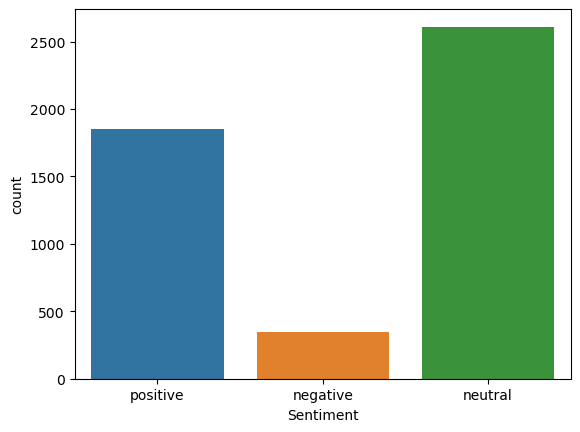

In [34]:
# Plot
sns.countplot(x='Sentiment',data=df)

### From the above graph we can see that Neutral Ratings are in the higher value followed by Postive Ratings and then Negative Ratings.

<AxesSubplot: ylabel='None'>

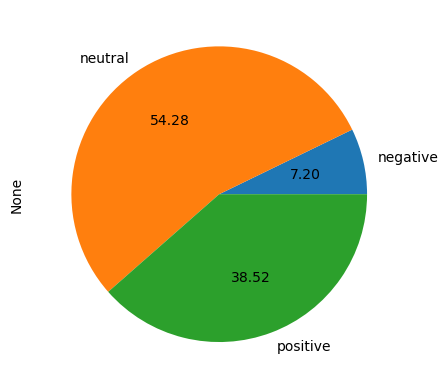

In [35]:
df.groupby('Sentiment').size().plot(kind='pie', autopct='%.2f')

#### Positive = 31.70%
#### Neutral = 53.58%
#### Negative = 14.72%

In [36]:
words = ' '.join(df['Sentence']).split()

num_count = 0
text_count = 0
punct_count = 0
others = 0

for char in words:
    if char.isdigit():
        num_count += 1
    elif char.isalpha():
        text_count +=1
    elif char in string.punctuation:
        punct_count +=1
    else:
        others+=1

counts_dict = {
    'Numbers': num_count,
    'Text': text_count,
    'Punctuation': punct_count,
    'Others': others
}
counts_series = pd.Series(counts_dict)

print(counts_series)

Numbers         2474
Text           77939
Punctuation     9295
Others          8084
dtype: int64


Text(0.5, 1.0, 'No of text string')

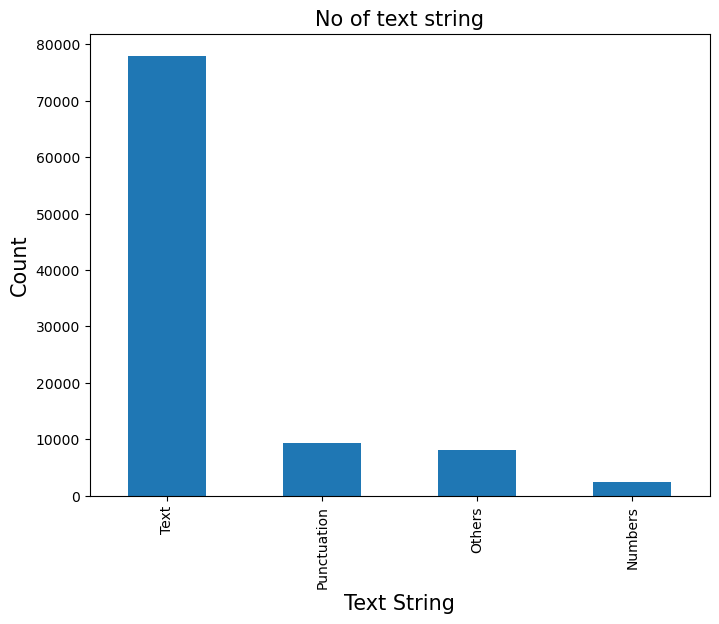

In [37]:
fig = plt.figure(figsize=(8,6))
counts_series.sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Text String', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('No of text string', fontsize = 15)

### Stop words (Raw Data)

In [38]:
stop_words = stopwords.words("english")
from collections import defaultdict
review_sw=defaultdict(int)
cnt=0
for char in words:
    if char in stop_words:
        review_sw[char]+=1

Text(0.5, 1.0, 'Most Frequently occured stopwords')

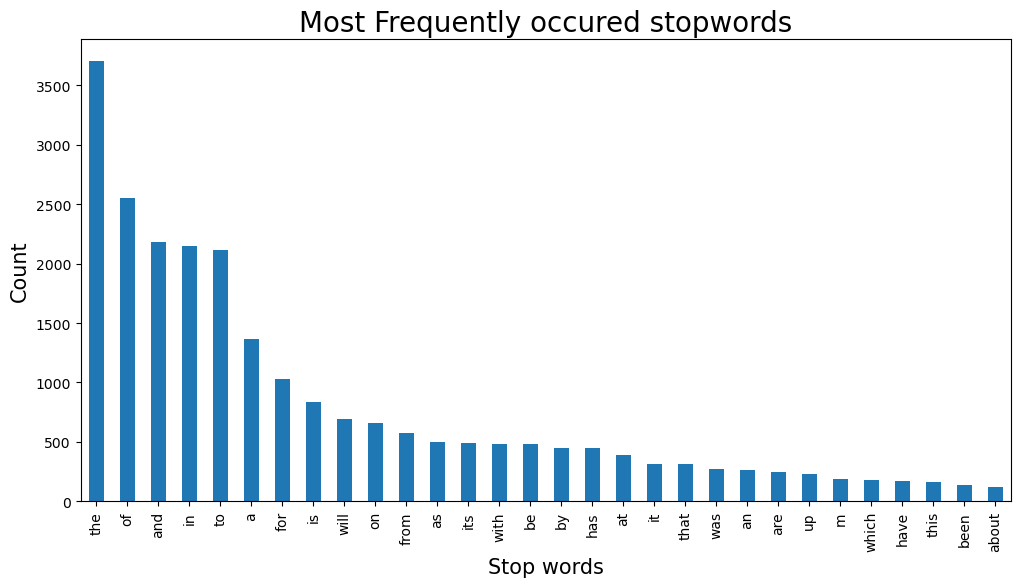

In [39]:
review_sw_series=pd.Series(review_sw).sort_values(ascending=False)
plt.figure(figsize=(12,6))
review_sw_series.head(30).plot(kind='bar')
plt.xlabel('Stop words',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Most Frequently occured stopwords',fontsize=20)

## Splitting the reviews based on positive,negative,neutral sentiment (Raw Data)

In [40]:
pos_words=[]
neg_words=[]
neu_words=[]

for i,j in zip(df.Sentence,df.Sentiment):
    words=i.split()
    if j=='positive':
        pos_words.extend(words)
    elif j=='negative':
        neg_words.extend(words)
    else:
        neu_words.extend(words)

## Analysing on Positive Words 

In [41]:
import re

def remove_url(text):
    
    text = re.sub(r'http\S+', '', text)
    
    
    text = re.sub(r'www\S+', '', text)
    
    return text

for i in range(len(pos_words)):
    pos_words[i] = remove_url(pos_words[i])


### Mosting occuring words in positive reviews (Raw Data)

In [42]:
pos_words.count('sales')

195

<AxesSubplot: >

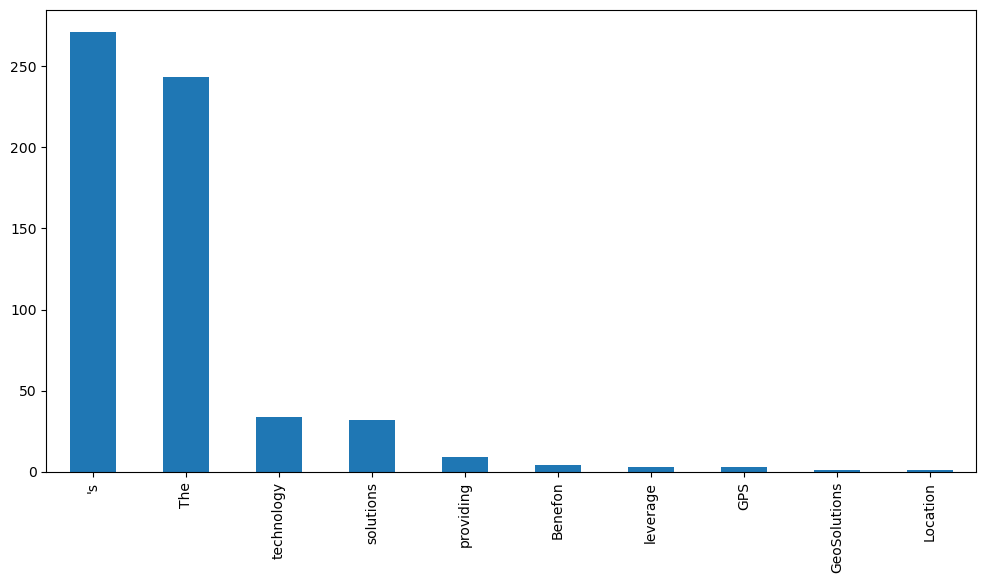

In [43]:
pos_count=defaultdict(int)

for char in pos_words:
    if char not in stop_words and char not in string.punctuation:
        
        pos_count[char]+=1
plt.figure(figsize=(12,6))   
pos_series=pd.Series(pos_count)
pos_series.head(10).sort_values(ascending=False).plot(kind='bar')

In [44]:
pos_series.sort_values(ascending=False)

EUR         384
's          271
The         243
mn          239
sales       195
           ... 
RCP           1
Adjusted      1
plus!         1
28%           1
assets:       1
Length: 7645, dtype: int64

### Unigrams-positive words (Raw Data)

Text(0.5, 1.0, 'Top 30 unigrams in positive Reviews')

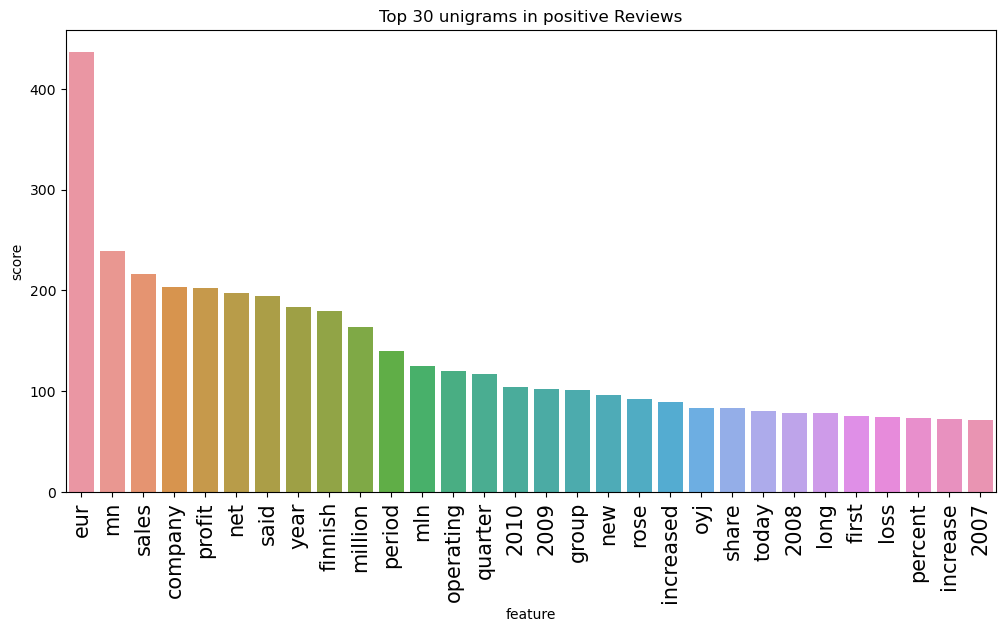

In [45]:
vectorizer = TfidfVectorizer(ngram_range=(1,1),stop_words=stop_words)

X = vectorizer.fit_transform(pos_words)

features = vectorizer.get_feature_names()
scores = X.sum(axis=0).A1
df_features = pd.DataFrame({'feature': features, 'score': scores})


df_features = df_features.sort_values('score', ascending=False)
df1=df_features.head(30)
fig=plt.figure(figsize=(12,6))
sns.barplot(data=df1,x=df1['feature'],y=df1['score'])
plt.xticks(rotation=90,fontsize=15)
plt.title('Top 30 unigrams in positive Reviews')

### Bigrams-positive words (Raw Data)

Text(0.5, 1.0, 'Top 30 bigrams in positive Reviews')

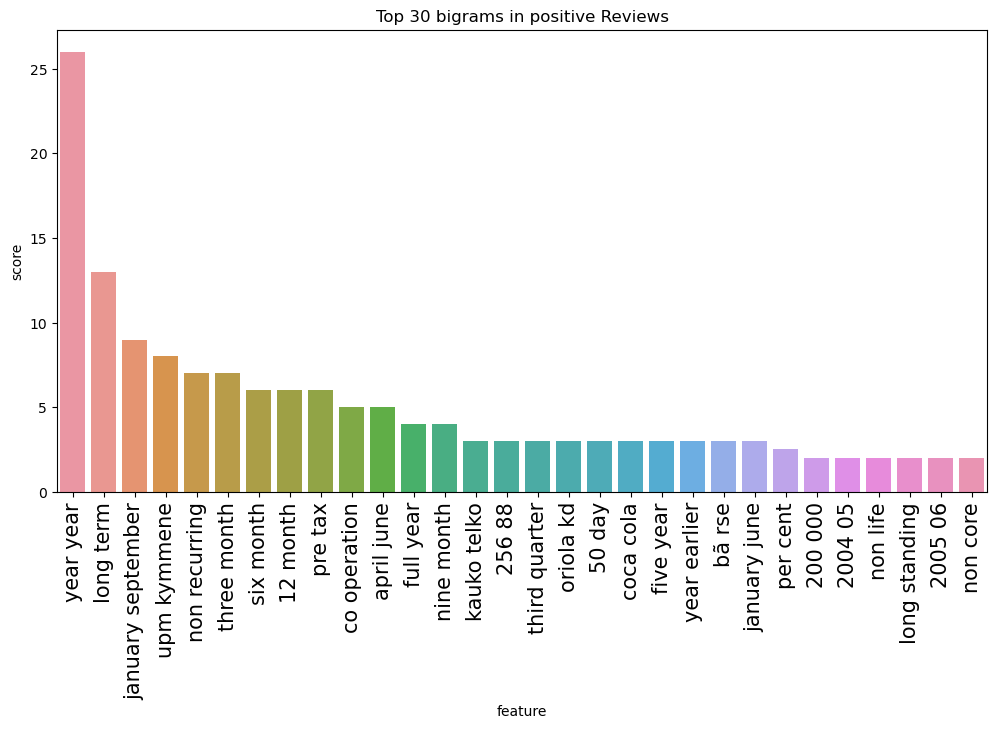

In [46]:
vectorizer = TfidfVectorizer(ngram_range=(2,2),stop_words=stop_words)

X = vectorizer.fit_transform(pos_words)

features = vectorizer.get_feature_names()
scores = X.sum(axis=0).A1
df_features = pd.DataFrame({'feature': features, 'score': scores})


df_features = df_features.sort_values('score', ascending=False)
df1=df_features.head(30)
fig=plt.figure(figsize=(12,6))
sns.barplot(data=df1,x=df1['feature'],y=df1['score'])
plt.xticks(rotation=90,fontsize=15)
plt.title('Top 30 bigrams in positive Reviews')

### Trigrams-positive words (Raw Data)

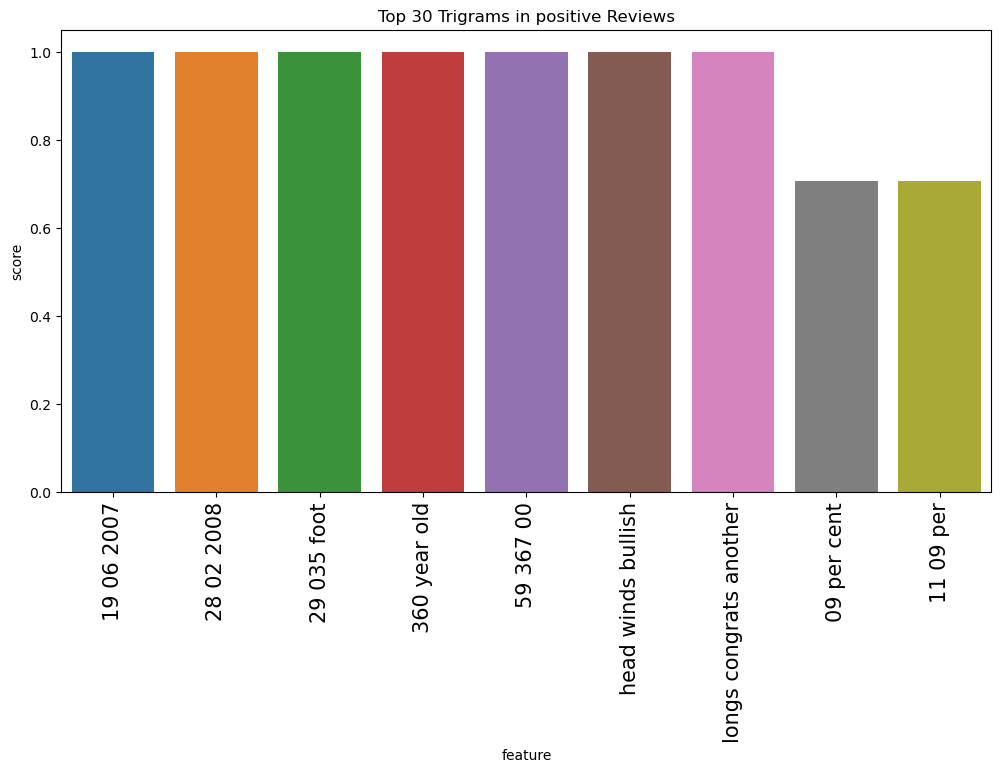

In [47]:
vectorizer = TfidfVectorizer(ngram_range=(3,3),stop_words=stop_words)

X = vectorizer.fit_transform(pos_words)

features = vectorizer.get_feature_names()
scores = X.sum(axis=0).A1
df_features = pd.DataFrame({'feature': features, 'score': scores})

df_features = df_features.sort_values('score', ascending=False)
df1=df_features.head(5000)
fig=plt.figure(figsize=(12,6))
sns.barplot(data=df1,x=df1['feature'],y=df1['score'])
plt.xticks(rotation=90,fontsize=15)
plt.title('Top 30 Trigrams in positive Reviews');

## Analysing on Negative words

In [48]:
import re

def remove_url(text):
    
    text = re.sub(r'http\S+', '', text)
    
    text = re.sub(r'www\S+', '', text)
    
    return text

for i in range(len(neg_words)):
    neg_words[i] = remove_url(neg_words[i])


In [49]:
neg_words

['$ESI',
 'on',
 'lows,',
 'down',
 '$1.50',
 'to',
 '$2.50',
 'BK',
 'a',
 'real',
 'possibility',
 "Shell's",
 '$70',
 'Billion',
 'BG',
 'Deal',
 'Meets',
 'Shareholder',
 'Skepticism',
 '$SAP',
 'Q1',
 'disappoints',
 'as',
 '#software',
 'licenses',
 'down.',
 'Real',
 'problem?',
 '#Cloud',
 'growth',
 'trails',
 '$MSFT',
 '$ORCL',
 '$GOOG',
 '$CRM',
 '$ADBE',
 '',
 '$AAPL',
 'afternoon',
 'selloff',
 'as',
 'usual',
 'will',
 'be',
 'brutal.',
 'get',
 'ready',
 'to',
 'lose',
 'a',
 'ton',
 'of',
 'money.',
 '$TSLA',
 'recalling',
 'pretty',
 'much',
 'every',
 'single',
 'model',
 'X',
 '@cnnbrk',
 'got',
 'to',
 'short',
 'that',
 'even',
 'at',
 'work',
 'you',
 'jump',
 'in',
 'money',
 'trade',
 'InterContinental',
 'Hotels',
 'first-quarter',
 'global',
 'room',
 'revenue',
 'lags',
 'estimates',
 'L&G',
 'still',
 'paying',
 'price',
 'for',
 'dividend',
 'cut',
 'during',
 'crisis,',
 'chief',
 'says',
 'AstraZeneca',
 'profit',
 'down',
 'as',
 'sales',
 'of',
 'stalwa

### Unigrams-Negative reviews  (Raw Data)

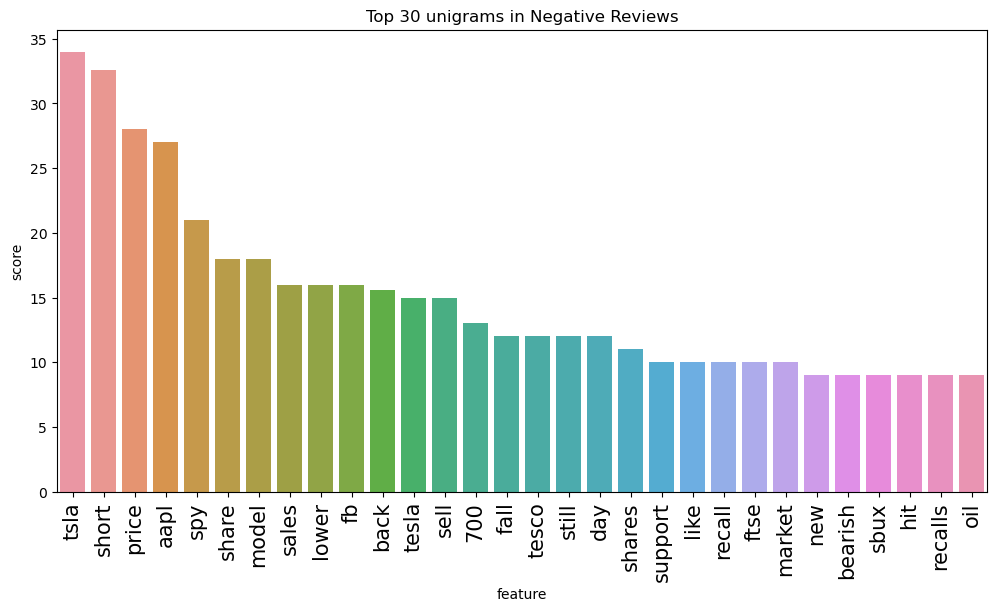

In [50]:
vectorizer=TfidfVectorizer(ngram_range=(1,1),stop_words=stop_words)

X=vectorizer.fit_transform(neg_words)

features = vectorizer.get_feature_names()
scores = X.sum(axis=0).A1
df_features = pd.DataFrame({'feature': features, 'score': scores})

df_features = df_features.sort_values('score', ascending=False)
df1=df_features.head(30)
fig=plt.figure(figsize=(12,6))
sns.barplot(data=df1,x=df1['feature'],y=df1['score'])
plt.xticks(rotation=90,fontsize=15)
plt.title('Top 30 unigrams in Negative Reviews');

### Bigrams-Negative reviews (Raw Data)

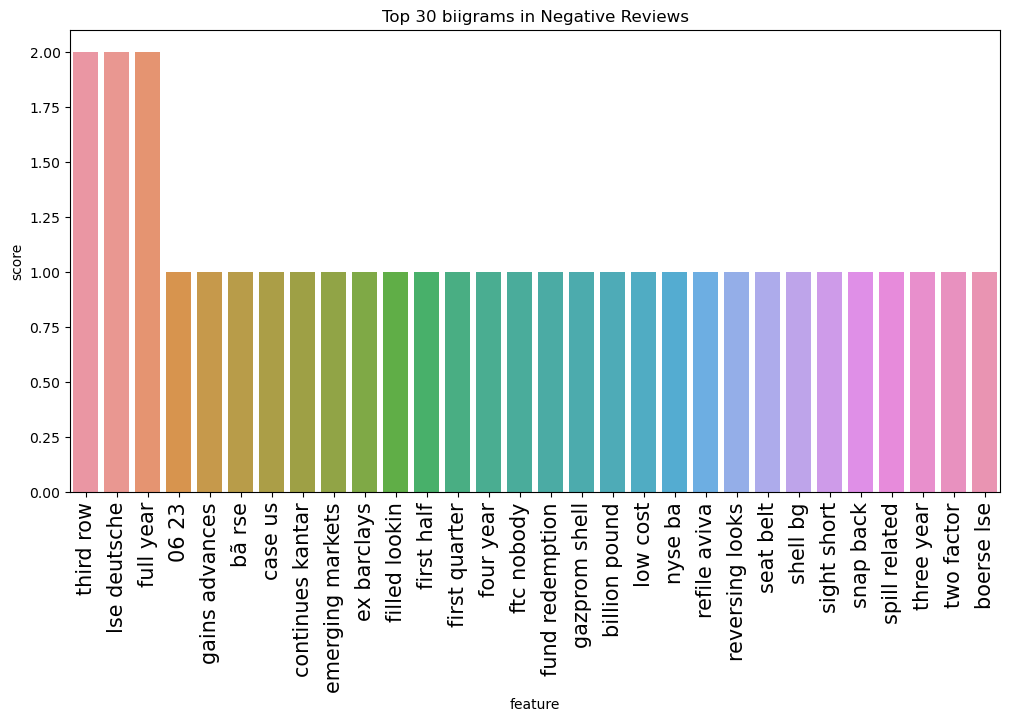

In [51]:
vectorizer=TfidfVectorizer(ngram_range=(2,2),stop_words=stop_words)

X=vectorizer.fit_transform(neg_words)

features = vectorizer.get_feature_names()
scores = X.sum(axis=0).A1
df_features = pd.DataFrame({'feature': features, 'score': scores})

df_features = df_features.sort_values('score', ascending=False)
df1=df_features.head(30)
fig=plt.figure(figsize=(12,6))
sns.barplot(data=df1,x=df1['feature'],y=df1['score'])
plt.xticks(rotation=90,fontsize=15)
plt.title('Top 30 biigrams in Negative Reviews');

### Mosting occuring words in negative reviews

<AxesSubplot: >

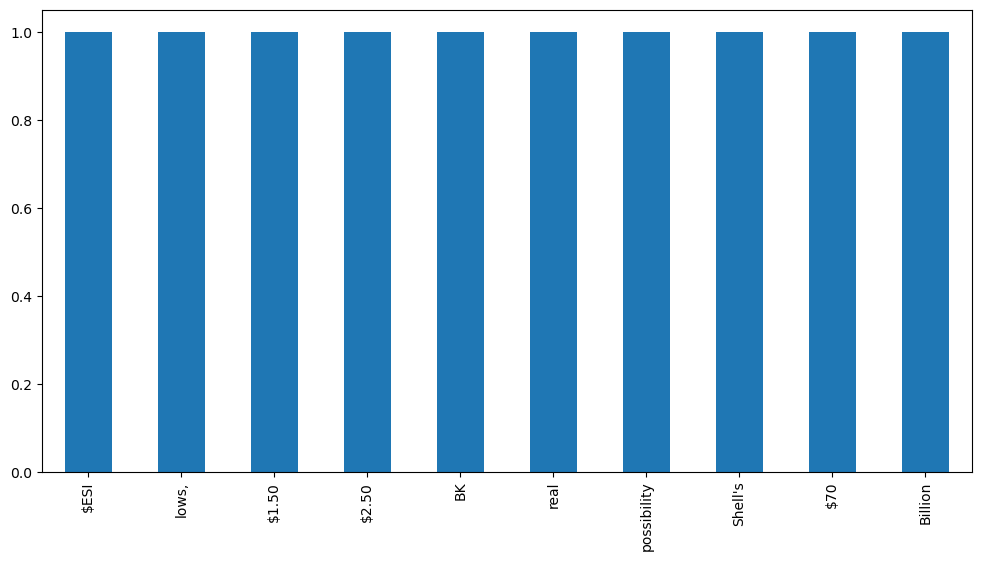

In [52]:
neg_count=defaultdict(int)

for char in neg_words:
    if char not in (stop_words or string.punctuation):
        
        neg_count[char]+=1
        
plt.figure(figsize=(12,6))   
pos_series=pd.Series(neg_count)
pos_series.head(10).sort_values(ascending=False).plot(kind='bar')

### Analysing on Neutral Reviews

In [53]:
import re

def remove_url(text):
    # remove URLs
    text = re.sub(r'http\S+', '', text)
    
    text = re.sub(r'www\S+', '', text)
    
    return text


for i in range(len(neu_words)):
    neu_words[i] = remove_url(neu_words[i])


In [54]:
neu_words

['According',
 'to',
 'the',
 'Finnish-Russian',
 'Chamber',
 'of',
 'Commerce',
 ',',
 'all',
 'the',
 'major',
 'construction',
 'companies',
 'of',
 'Finland',
 'are',
 'operating',
 'in',
 'Russia',
 '.',
 'The',
 'Swedish',
 'buyout',
 'firm',
 'has',
 'sold',
 'its',
 'remaining',
 '22.4',
 'percent',
 'stake',
 ',',
 'almost',
 'eighteen',
 'months',
 'after',
 'taking',
 'the',
 'company',
 'public',
 'in',
 'Finland',
 '.',
 'The',
 'Stockmann',
 'department',
 'store',
 'will',
 'have',
 'a',
 'total',
 'floor',
 'space',
 'of',
 'over',
 '8,000',
 'square',
 'metres',
 'and',
 'Stockmann',
 "'s",
 'investment',
 'in',
 'the',
 'project',
 'will',
 'have',
 'a',
 'price',
 'tag',
 'of',
 'about',
 'EUR',
 '12',
 'million',
 '.',
 'Ahlstrom',
 'Corporation',
 'STOCK',
 'EXCHANGE',
 'ANNOUNCEMENT',
 '7.2.2007',
 'at',
 '10.30',
 'A',
 'total',
 'of',
 '56,955',
 'new',
 'shares',
 'of',
 'Ahlstrom',
 'Corporation',
 'have',
 'been',
 'subscribed',
 'with',
 'option',
 'rights',

### Unigrams-Neutral Reviews (Raw Data)

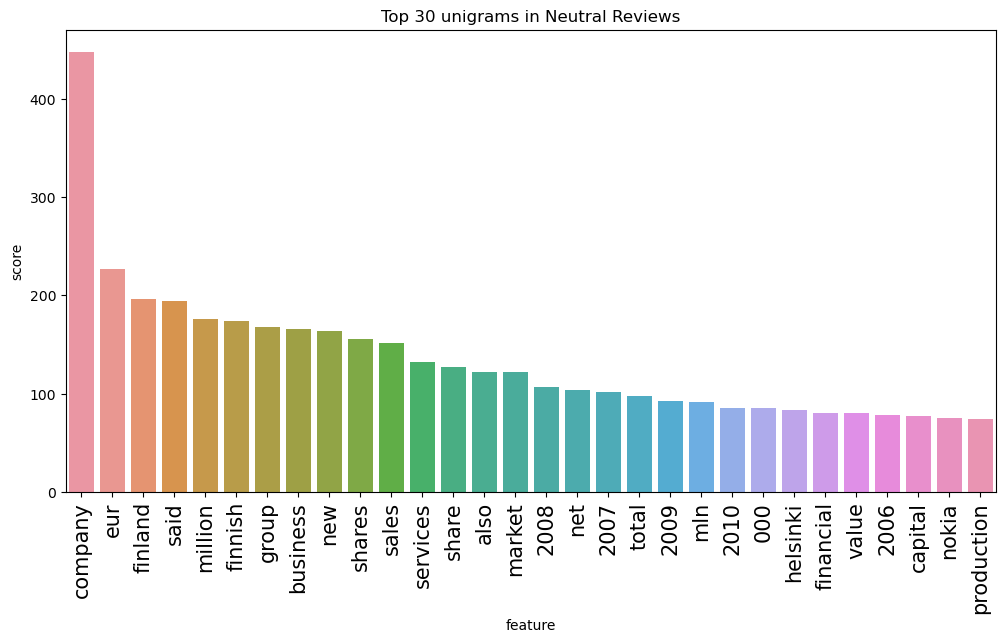

In [55]:
vectorizer=TfidfVectorizer(ngram_range=(1,1),stop_words=stop_words)

X=vectorizer.fit_transform(neu_words)

features = vectorizer.get_feature_names()
scores = X.sum(axis=0).A1
df_features = pd.DataFrame({'feature': features, 'score': scores})

df_features = df_features.sort_values('score', ascending=False)
df1=df_features.head(30)
fig=plt.figure(figsize=(12,6))
sns.barplot(data=df1,x=df1['feature'],y=df1['score'])
plt.xticks(rotation=90,fontsize=15)
plt.title('Top 30 unigrams in Neutral Reviews');

### Bigrams-Neutral Reviews (Raw Data)

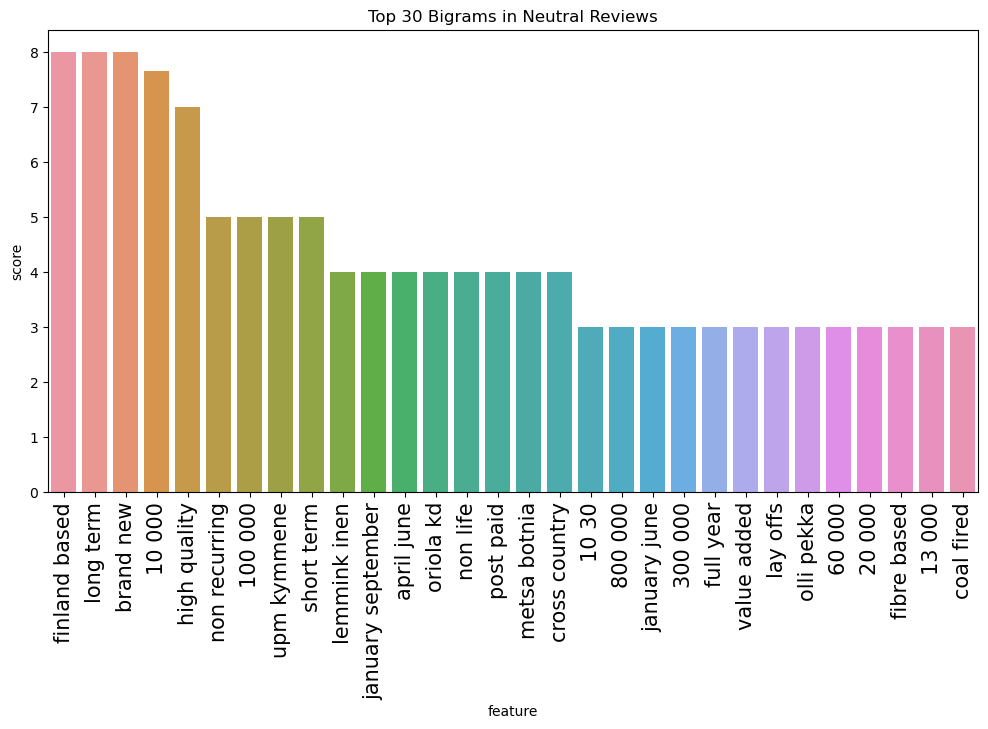

In [56]:
vectorizer=TfidfVectorizer(ngram_range=(2,2),stop_words=stop_words)

X=vectorizer.fit_transform(neu_words)

features = vectorizer.get_feature_names()
scores = X.sum(axis=0).A1
df_features = pd.DataFrame({'feature': features, 'score': scores})

df_features = df_features.sort_values('score', ascending=False)
df1=df_features.head(30)
fig=plt.figure(figsize=(12,6))
sns.barplot(data=df1,x=df1['feature'],y=df1['score'])
plt.xticks(rotation=90,fontsize=15)
plt.title('Top 30 Bigrams in Neutral Reviews');

### Trigrams-Neutral Reviews (Raw Data)

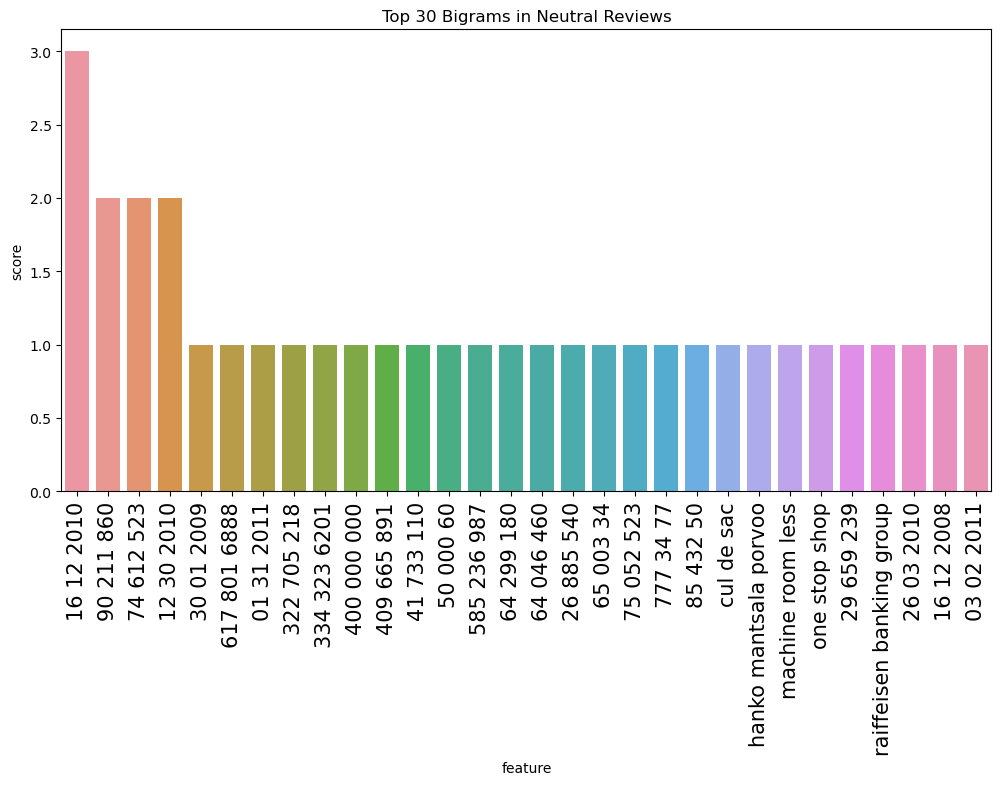

In [57]:
vectorizer=TfidfVectorizer(ngram_range=(3,3),stop_words=stop_words)

X=vectorizer.fit_transform(neu_words)

features = vectorizer.get_feature_names()
scores = X.sum(axis=0).A1
df_features = pd.DataFrame({'feature': features, 'score': scores})

df_features = df_features.sort_values('score', ascending=False)
df1=df_features.head(30)
fig=plt.figure(figsize=(12,6))
sns.barplot(data=df1,x=df1['feature'],y=df1['score'])
plt.xticks(rotation=90,fontsize=15)
plt.title('Top 30 Bigrams in Neutral Reviews');

### Word cloud (Raw Data)

In [58]:
def wordcount_gen(df,Sentiment):
    '''
    Generating Word Cloud
    inputs:
        - df:tweets dataset
        - category: Positive/Negative/Neutral
    '''
    #  Combine all tweets
    combined_sentance = " ".join([ Sentence for Sentence in df[df.Sentiment==Sentiment]['Sentence']])

    # Initialize wordcloud object
    wc = WordCloud(background_color='black', 
                    max_words=50, colormap='Set2',
                    stopwords = STOPWORDS)
    
    # Generate and plot wordcloud
    plt.figure(figsize=(15,10))
    plt.imshow(wc.generate(combined_sentance))
    plt.title('{} Sentiment Words'.format(Sentiment), fontsize=20)
    plt.axis('off')
    plt.show()

### 1. Word cloud for Positive Words (Raw Data)

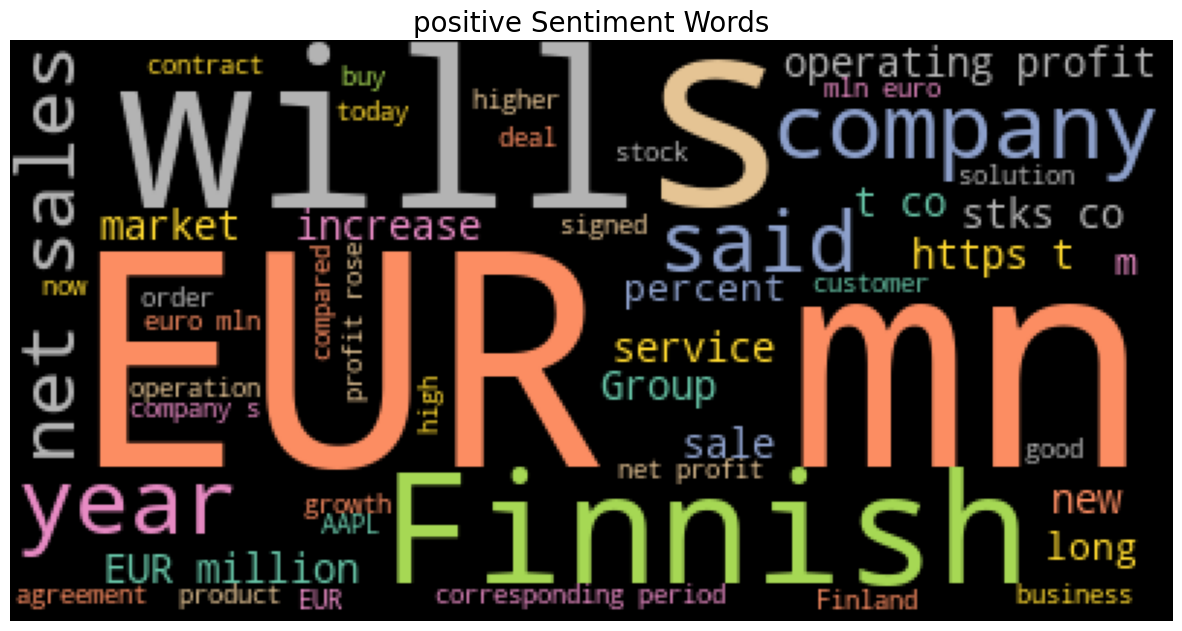

In [59]:
wordcount_gen(df, 'positive')

#### Insights:

Net Agreement

Sales Operation

Sale Contract

Operating Profit

Good Group

Stks Increase (Which refers to company's Stocks price increases)

Company's Profit Rose 

### 2. Word cloud for Negative Words (Raw Data)

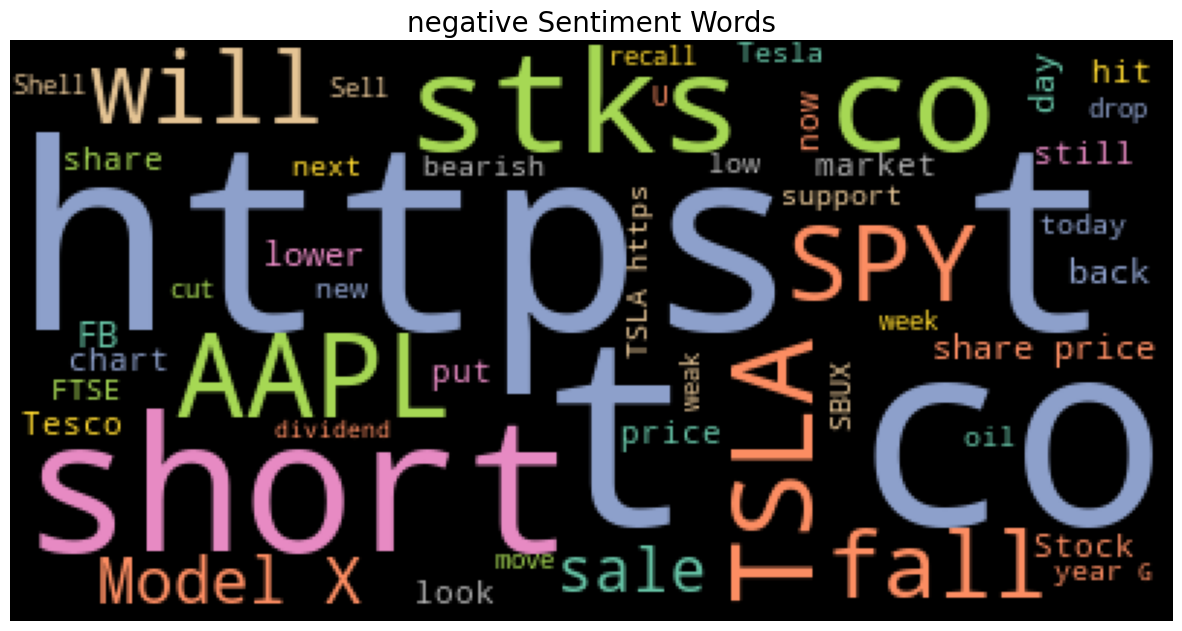

In [60]:
wordcount_gen(df, 'negative')

#### Insights:

Operating loss 

Net Profit fell 3 quarter 

Decreased a year earlier share price(decreased from the previous year's share price  

Market Fall

### 3. Word cloud for Neutral Words

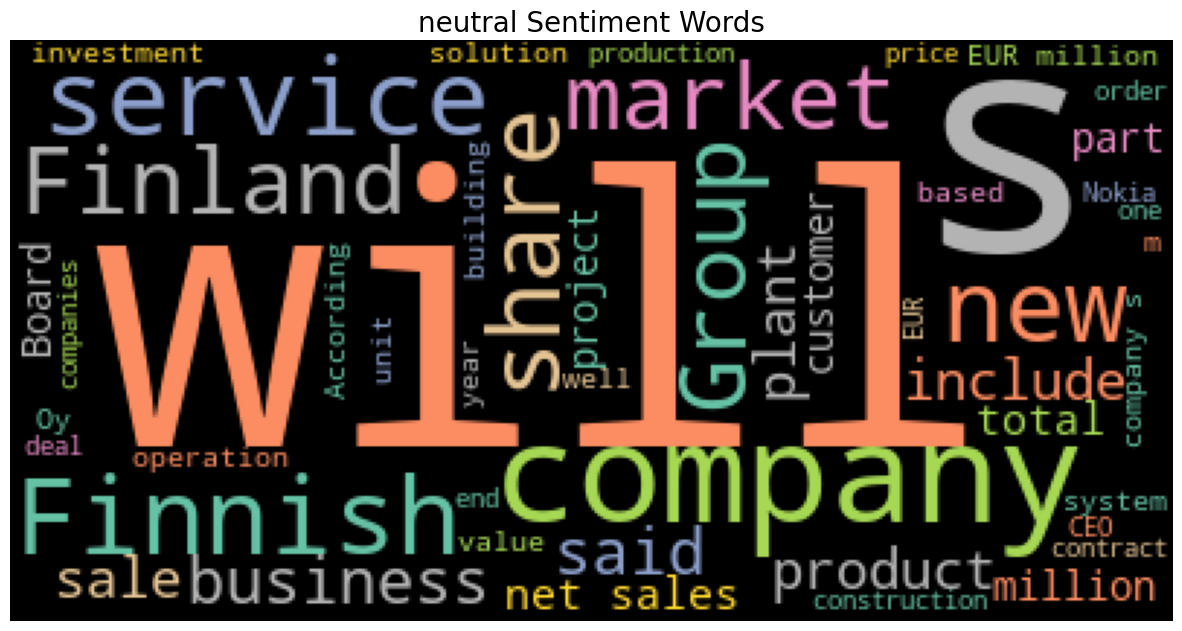

In [61]:
wordcount_gen(df, 'neutral')

## <h1><center><font color=1E9199>Model Building</font></center></h1>

### Text Preprocessing:
remove both the leading and the trailing characters removes empty strings, because they are considered in Python as False Joining the list into one string/text

Remove Twitter username handles from a given twitter text. (Removes @usernames)

Again Joining the list into one string/text

Remove Punctuations

Remove https or url within text

Converting into Text Tokens

Tokenization

Remove Stopwords

Normalize the data

Stemming (Optional)

Lemmatization

In [62]:
df = df_fsa.copy() 

In [63]:
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


#### Normalize the data

In [64]:
df.Sentence=df.Sentence.apply(lambda x: x.lower())
df

,Sentence,Sentiment
0,the geosolutions technology will leverage bene...,positive
1,"$esi on lows, down $1.50 to $2.50 bk a real po...",negative
2,"for the last quarter of 2010 , componenta 's n...",positive
3,according to the finnish-russian chamber of co...,neutral
4,the swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,rising costs have forced packaging producer hu...,negative
5838,nordic walking was first used as a summer trai...,neutral
5839,"according shipping company viking line , the e...",neutral
5840,"in the building and home improvement trade , s...",neutral


#### Normalize Numbers Using $ and % sign

In [65]:
def normalize_numbers(text):
    # Replace all monetary amounts with a standardized format
    text = re.sub(r'\$\d+(\.\d+)?', '$MONEY', text)
    # Replace all percentages with a standardized format
    text = re.sub(r'\d+(\.\d+)?%', '%PERCENTAGE', text)
    
    return text

In [66]:
df['Sentence'] = df['Sentence'].apply(normalize_numbers)
df

,Sentence,Sentiment
0,the geosolutions technology will leverage bene...,positive
1,"$esi on lows, down $MONEY to $MONEY bk a real ...",negative
2,"for the last quarter of 2010 , componenta 's n...",positive
3,according to the finnish-russian chamber of co...,neutral
4,the swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,rising costs have forced packaging producer hu...,negative
5838,nordic walking was first used as a summer trai...,neutral
5839,"according shipping company viking line , the e...",neutral
5840,"in the building and home improvement trade , s...",neutral


### Preprocessing

In [67]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91730\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\91730\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [68]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [69]:
def preprocess(text):
    # remove HTML tags and URLs
    text = re.sub(r'http\S+', '', text)
    text = BeautifulSoup(text, "html.parser").get_text()
    # remove non-alphabetical characters and digits
    text = re.sub('[^a-zA-Z\s]', '', text)
    # convert to lowercase
    text = text.lower()
    # tokenize the text
    tokens = word_tokenize(text)
    # remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    # join the tokens back into a string
    text = ' '.join(lemmatized_tokens)
    return text

In [70]:
df['Sentence'] = df['Sentence'].apply(preprocess)
df

,Sentence,Sentiment
0,geosolutions technology leverage benefon gps s...,positive
1,esi low money money bk real possibility,negative
2,last quarter componenta net sale doubled eurm ...,positive
3,according finnishrussian chamber commerce majo...,neutral
4,swedish buyout firm sold remaining percent sta...,neutral
...,...,...
5837,rising cost forced packaging producer huhtamak...,negative
5838,nordic walking first used summer training meth...,neutral
5839,according shipping company viking line eu deci...,neutral
5840,building home improvement trade sale decreased...,neutral


In [71]:
df.to_csv('Preprocessed', index=False)

In [72]:
def get_nonstopword_frequencies(dataset_file_path):

    # Create three separate DataFrames for each class
    positive_df = df[df['Sentiment'] == 'positive']
    negative_df = df[df['Sentiment'] == 'negative']
    neutral_df = df[df['Sentiment'] == 'neutral']

    # Tokenize the text column and create a set of unique words for each class
    positive_words = set(nltk.tokenize.word_tokenize(' '.join(positive_df['Sentence'].tolist())))
    negative_words = set(nltk.tokenize.word_tokenize(' '.join(negative_df['Sentence'].tolist())))
    neutral_words = set(nltk.tokenize.word_tokenize(' '.join(neutral_df['Sentence'].tolist())))

    # Combine the sets of words into a single set
    all_words = positive_words.union(negative_words).union(neutral_words)

    # Create a list of stop words from NLTK
    stop_words = set(nltk.corpus.stopwords.words('english'))

    # Remove stop words from the set of all words
    non_stop_words = all_words.difference(stop_words)

    # Calculate the frequency of each non-stop word in each class
    positive_freqdist = nltk.FreqDist([word for word in nltk.tokenize.word_tokenize(' '.join(positive_df['Sentence'].tolist())) if word in non_stop_words])
    negative_freqdist = nltk.FreqDist([word for word in nltk.tokenize.word_tokenize(' '.join(negative_df['Sentence'].tolist())) if word in non_stop_words])
    neutral_freqdist = nltk.FreqDist([word for word in nltk.tokenize.word_tokenize(' '.join(neutral_df['Sentence'].tolist())) if word in non_stop_words])

    # Create a pandas DataFrame for non-stop words
    df_nonstopwords = pd.DataFrame(columns=['Word', 'Positive_Frequency', 'Negative_Frequency', 'Neutral_Frequency', 'Average_Frequency', 'Total_Frequency'])

    # Loop over all non-stop words and add their frequencies to the DataFrame
    for word in non_stop_words:
        freqs = [positive_freqdist[word], negative_freqdist[word], neutral_freqdist[word]]
        total_freq = sum(freqs)
        avg_freq = sum(freqs) / len(freqs)
        df_nonstopwords = df_nonstopwords.append({'Word': word, 
                                                  'Positive_Frequency': positive_freqdist[word], 
                                                  'Negative_Frequency': negative_freqdist[word], 
                                                  'Neutral_Frequency': neutral_freqdist[word],
                                                  'Average_Frequency': avg_freq,
                                                  'Total_Frequency': total_freq}, 
                                                 ignore_index=True)

    # Sort the DataFrame by the Average_Frequency column in descending order
    df_nonstopwords = df_nonstopwords.sort_values(by='Total_Frequency', ascending=False)

    # Return the sorted DataFrame
    return df_nonstopwords

In [73]:
df_freq_words = get_nonstopword_frequencies('df')

In [74]:
df_freq_words.head(25)

,Word,Positive_Frequency,Negative_Frequency,Neutral_Frequency,Average_Frequency,Total_Frequency
7387,eur,582,376,669,542.333333,1627
2104,company,232,89,596,305.666667,917
1883,mn,257,233,325,271.666667,815
7156,sale,229,109,269,202.333333,607
3789,profit,208,160,216,194.666667,584
9,finnish,177,89,261,175.666667,527
2989,said,194,64,258,172.000000,516
8073,share,110,74,329,171.000000,513
802,net,197,100,202,166.333333,499
7982,million,164,79,251,164.666667,494


In [75]:
most_freq_words=df_freq_words[(df_freq_words['Total_Frequency']>200)]

In [76]:
most_freq_words = set(most_freq_words['Word'].tolist())

In [77]:
most_freq_words

{'also',
 'business',
 'company',
 'eur',
 'euro',
 'finland',
 'finnish',
 'first',
 'group',
 'loss',
 'market',
 'million',
 'mln',
 'mn',
 'net',
 'new',
 'operating',
 'oyj',
 'period',
 'profit',
 'quarter',
 'said',
 'sale',
 'service',
 'share',
 'today',
 'year'}

In [78]:
def remove_words(text):
    words = text.split()
    filtered_words = [word for word in words if word not in most_freq_words]
    filtered_text = ' '.join(filtered_words)
    return filtered_text

In [79]:
df['Sentence'] = df['Sentence'].apply(remove_words)
df

,Sentence,Sentiment
0,geosolutions technology leverage benefon gps s...,positive
1,esi low money money bk real possibility,negative
2,last componenta doubled eurm eurm earlier move...,positive
3,according finnishrussian chamber commerce majo...,neutral
4,swedish buyout firm sold remaining percent sta...,neutral
...,...,...
5837,rising cost forced packaging producer huhtamak...,negative
5838,nordic walking used summer training method cro...,neutral
5839,according shipping viking line eu decision sig...,neutral
5840,building home improvement trade decreased,neutral


### TF-IDF

In [80]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf = TfidfVectorizer()

In [81]:
X=tfidf.fit_transform(df['Sentence'])

In [82]:
empty_rows = (X.sum(axis=1) == 0).nonzero()[0]
empty_rows

array([  75,   76,  234,  433,  921, 1037, 1503, 1695, 1764, 1837, 1964,
       2544, 2617, 3693, 3915, 4987, 5582], dtype=int64)

In [83]:
print(df.iloc[empty_rows])

     Sentence Sentiment
75              neutral
76             positive
234             neutral
433            positive
921             neutral
1037            neutral
1503            neutral
1695            neutral
1764            neutral
1837           positive
1964           negative
2544           positive
2617           negative
3693           positive
3915           negative
4987            neutral
5582           positive


In [84]:
df.drop(empty_rows, inplace=True)

In [85]:
X=tfidf.fit_transform(df['Sentence'])

In [86]:
empty_rows = (X.sum(axis=1) == 0).nonzero()[0]
empty_rows

array([], dtype=int64)

In [87]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(df["Sentiment"])
from collections import Counter
Counter(y)

Counter({2: 1846, 0: 857, 1: 3122})

In [88]:
class_labels = list(le.classes_)
class_labels_numerical = list(le.transform(class_labels))

In [89]:
print("Class labels:", class_labels)
print("Numerical labels:", class_labels_numerical)

Class labels: ['negative', 'neutral', 'positive']
Numerical labels: [0, 1, 2]


# SMOTEENN- combination of up and down sampling

In [90]:
!pip install imblearn

In [91]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(sampling_strategy={0: 3128, 1: 3300, 2: 3200},random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [92]:
Counter(y_resampled)

Counter({0: 1807, 1: 528, 2: 2119})

# Train Test Split

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.20, random_state = 42)

# Support Vector Machine

In [95]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

In [96]:
SupportVector = SVC()

In [97]:
SupportVector.fit(X_train, y_train)

SVC()

In [98]:
y_pred_SV = SupportVector.predict(X_test)
print(classification_report(y_test, y_pred_SV))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       379
           1       1.00      0.78      0.88        99
           2       0.92      0.99      0.95       413

    accuracy                           0.95       891
   macro avg       0.97      0.91      0.93       891
weighted avg       0.95      0.95      0.95       891



In [99]:
confusion_matrix(y_test, y_pred_SV)

array([[362,   0,  17],
       [  2,  77,  20],
       [  4,   0, 409]], dtype=int64)

In [100]:
y_train_pred_SV = SupportVector.predict(X_train)
print(classification_report(y_train, y_train_pred_SV))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1428
           1       1.00      1.00      1.00       429
           2       1.00      1.00      1.00      1706

    accuracy                           1.00      3563
   macro avg       1.00      1.00      1.00      3563
weighted avg       1.00      1.00      1.00      3563



In [101]:
from sklearn.model_selection import cross_val_score

In [102]:
scores_SV = cross_val_score(SupportVector, X_train, y_train, cv=5)
scores_SV

array([0.93548387, 0.95231417, 0.93548387, 0.92696629, 0.94803371])

In [103]:
print(f"Mean CV score: {np.mean(scores_SV)}")
print(f"Standard deviation: {np.std(scores_SV)}")

Mean CV score: 0.9396563814866761
Standard deviation: 0.00923317008557208


In [104]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

In [105]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    # Plot the training and validation scores
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

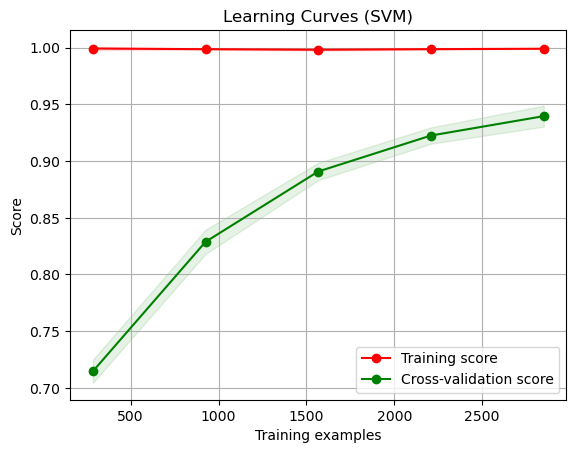

In [106]:
title = "Learning Curves (SVM)"
plot_learning_curve(SupportVector, title, X_train, y_train, cv=5)
plt.show()

# Random Forest 

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
RandomForest = RandomForestClassifier()

In [109]:
RandomForest.fit(X_train, y_train)

RandomForestClassifier()

In [110]:
y_pred_RF = RandomForest.predict(X_test)
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       379
           1       0.93      0.83      0.88        99
           2       0.90      0.96      0.93       413

    accuracy                           0.93       891
   macro avg       0.93      0.90      0.92       891
weighted avg       0.93      0.93      0.93       891



In [111]:
confusion_matrix(y_test, y_pred_RF)

array([[349,   2,  28],
       [  0,  82,  17],
       [ 12,   4, 397]], dtype=int64)

In [112]:
y_train_pred_RF = RandomForest.predict(X_train)
print(classification_report(y_train, y_train_pred_RF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1428
           1       1.00      1.00      1.00       429
           2       1.00      1.00      1.00      1706

    accuracy                           1.00      3563
   macro avg       1.00      1.00      1.00      3563
weighted avg       1.00      1.00      1.00      3563



In [113]:
scores_RF = cross_val_score(RandomForest, X_train, y_train, cv=5)
scores_RF

array([0.93408135, 0.92426367, 0.90603086, 0.91853933, 0.93258427])

In [114]:
print(f"Mean CV score: {np.mean(scores_RF)}")
print(f"Standard deviation: {np.std(scores_RF)}")

Mean CV score: 0.9230998944166917
Standard deviation: 0.010237684506097435


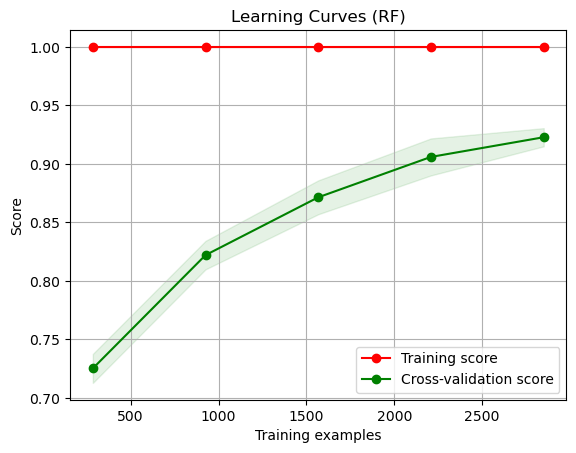

In [115]:
title3 = "Learning Curves (RF)"
plot_learning_curve(RandomForest, title3, X_train, y_train, cv=5)
plt.show()

# Naive Bayes 'MultinomialNB' 

In [116]:
from sklearn.naive_bayes import MultinomialNB

In [117]:
Multinomial =  MultinomialNB()

In [118]:
Multinomial.fit(X_train, y_train)

MultinomialNB()

In [119]:
y_pred_M = Multinomial.predict(X_test)
print(classification_report(y_test, y_pred_M))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       379
           1       1.00      0.38      0.55        99
           2       0.85      0.97      0.90       413

    accuracy                           0.89       891
   macro avg       0.93      0.76      0.80       891
weighted avg       0.90      0.89      0.88       891



In [120]:
confusion_matrix(y_test, y_pred_M)

array([[356,   0,  23],
       [ 11,  38,  50],
       [ 13,   0, 400]], dtype=int64)

In [121]:
y_train_pred_M = Multinomial.predict(X_train)
print(classification_report(y_train, y_train_pred_M))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1428
           1       1.00      0.61      0.75       429
           2       0.90      0.99      0.94      1706

    accuracy                           0.93      3563
   macro avg       0.96      0.85      0.89      3563
weighted avg       0.94      0.93      0.93      3563



In [122]:
scores_M = cross_val_score(Multinomial, X_train, y_train, cv=5)
scores_M

array([0.86816269, 0.88078541, 0.86676017, 0.87359551, 0.87780899])

In [123]:
print(f"Mean CV score: {np.mean(scores_M)}")
print(f"Standard deviation: {np.std(scores_M)}")

Mean CV score: 0.8734225538553666
Standard deviation: 0.005395107938604145


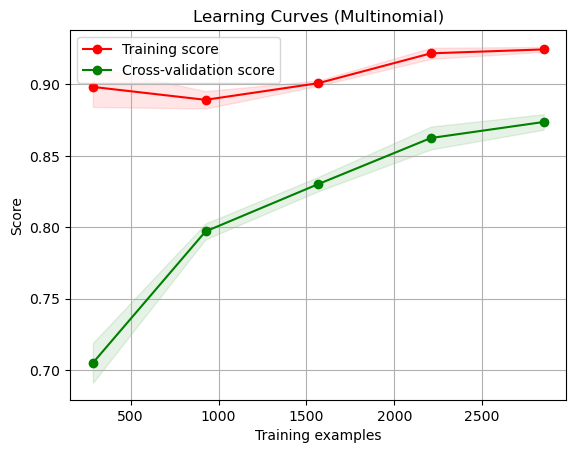

In [124]:
title2 = "Learning Curves (Multinomial)"
plot_learning_curve(Multinomial, title2, X_train, y_train, cv=5)
plt.show()

# Logistic Regression

In [125]:
from sklearn.linear_model import LogisticRegression

In [126]:
LogisticRegression = LogisticRegression()

In [127]:
LogisticRegression.fit(X_train, y_train)

LogisticRegression()

In [128]:
y_pred_LR = LogisticRegression.predict(X_test)
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       379
           1       1.00      0.66      0.79        99
           2       0.90      0.98      0.94       413

    accuracy                           0.93       891
   macro avg       0.95      0.86      0.90       891
weighted avg       0.94      0.93      0.93       891



In [129]:
confusion_matrix(y_test, y_pred_LR)

array([[362,   0,  17],
       [  6,  65,  28],
       [  8,   0, 405]], dtype=int64)

In [130]:
y_train_pred_LR = LogisticRegression.predict(X_train)
print(classification_report(y_train, y_train_pred_LR))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1428
           1       1.00      0.89      0.94       429
           2       0.97      0.99      0.98      1706

    accuracy                           0.98      3563
   macro avg       0.98      0.96      0.97      3563
weighted avg       0.98      0.98      0.98      3563



In [131]:
scores_LR = cross_val_score(LogisticRegression, X_train, y_train, cv=5)
scores_LR

array([0.914446  , 0.91865358, 0.91164095, 0.90168539, 0.92275281])

In [132]:
print(f"Mean CV score: {np.mean(scores_LR)}")
print(f"Standard deviation: {np.std(scores_LR)}")

Mean CV score: 0.9138357470413035
Standard deviation: 0.00714907127885239


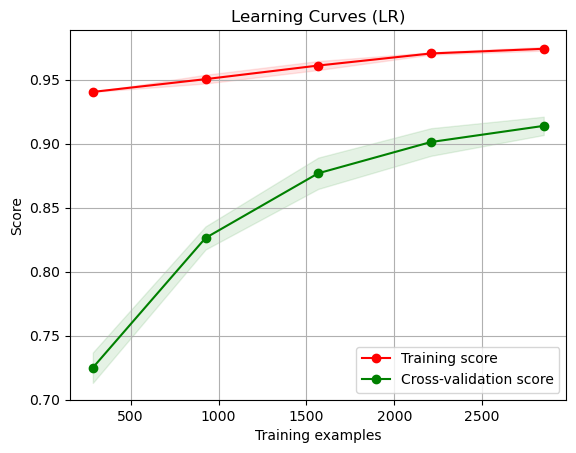

In [133]:
title4 = "Learning Curves (LR)"
plot_learning_curve(LogisticRegression, title4, X_train, y_train, cv=5)
plt.show()

# XGboost

In [134]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
xgb_clf = xgb.XGBClassifier(learning_rate=0.5, max_depth=5, n_estimators=200)
xgb_clf.fit(X_train, y_train)
y_pred_xg=xgb_clf.predict(X_test)
print('Train accuracy:{}'.format(xgb_clf.score(X_train,y_train)))
print('Test accuracy:{}'.format(xgb_clf.score(X_test,y_test)))

print(metrics.classification_report(y_test,y_pred_xg))

Train accuracy:0.9980353634577603
Test accuracy:0.9371492704826038


NameError: name 'metrics' is not defined

In [135]:
confusion_matrix(y_test, y_pred_xg)

array([[360,   2,  17],
       [  3,  85,  11],
       [ 18,   5, 390]], dtype=int64)

In [136]:
scores_xg = cross_val_score(xgb_clf, X_train, y_train, cv=5)
scores_xg

array([0.91164095, 0.91725105, 0.91304348, 0.89325843, 0.92275281])

In [137]:
print(f"Mean CV score: {np.mean(scores_xg)}")
print(f"Standard deviation: {np.std(scores_xg)}")

Mean CV score: 0.9115893439652047
Standard deviation: 0.00994804077327605


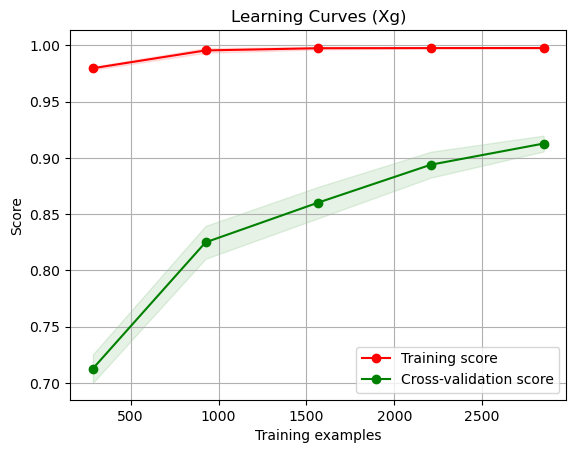

In [138]:
title5 = "Learning Curves (Xg)"
plot_learning_curve(xgb_clf, title5, X_train, y_train, cv=5)
plt.show()

In [139]:
def predict_sentiment(text):
    if text is None:
        return ''
    text = re.sub('<[^<]+?>', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub('[^A-Za-z]', ' ', text.lower())
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    words = [word for word in words if word is not None]
    text = ' '.join(words)
    text_tfidf = tfidf.transform([text])
    prediction = LogisticRegression.predict(text_tfidf)
    
    # Convert the predicted label to the corresponding sentiment class
    if prediction == 0:
        return "negative"
    elif prediction == 1:
        return "neutral"
    elif prediction == 2:
        return "positive"
    else:
        return ""

In [140]:
predict_sentiment('his company was very bad in the starting, but now he has improved so much in all aspects')

'positive'

In [144]:
predict_sentiment("company is bad")

'positive'

In [142]:
predict_sentiment("company is not performing that well")

'positive'

# Results of Model using Tf-idf

In [145]:
res1={'Models':['logistic regression','SVM','Naive bayes','Random forest','Xgboost'],
    'Training Acc':[LogisticRegression.score(X_train,y_train),SupportVector.score(X_train,y_train),Multinomial.score(X_train,y_train),
                    RandomForest.score(X_train,y_train),xgb_clf.score(X_train,y_train)],
    'Testing Acc':[LogisticRegression.score(X_test,y_test),SupportVector.score(X_test,y_test),Multinomial.score(X_test,y_test),
                    RandomForest.score(X_test,y_test),xgb_clf.score(X_test,y_test)]}

In [146]:
res1=pd.DataFrame(res1)
res1

,Models,Training Acc,Testing Acc
0,logistic regression,0.977547,0.933782
1,SVM,0.999439,0.951740
2,Naive bayes,0.933483,0.891134
3,Random forest,1.000000,0.929293
4,Xgboost,0.998035,0.937149


### Word cloud for All words (Cleaned Data)

plt.figure(figsize=(18,6))
from wordcloud import WordCloud 
word_cloud = WordCloud(collocations = False, background_color = 'white' ).generate(filtered_text)
plt.imshow(word_cloud, interpolation='bilinear') 